In [117]:
import numpy as np
import time
from matplotlib import pyplot as plt
import pickle
import os
from sklearn.manifold import TSNE
from numpy.random import rand
%matplotlib inline
%matplotlib nbagg

In [118]:
def walk_manifold(ims,ts,lbl=None,rev_label_keys=None):
    ''' Thanks to this example: http://matplotlib.org/examples/event_handling/pick_event_demo.html
    Function that plots low dim embedding and then displays orig high dim image
    based on what point was clicked
    Args:
        ims (numpy array): array of images -> shape is (num_ims x 8 x 24)
        ts (numpy array:): low dim embedding -> shape (num_ims,2)
'''
    def onpick3(event):
        '''function that executes when point is clicked
        Args
            event (some matplotlib artist): data structure describing point clicked'''
        
        #get index of the point clicked
        ind = event.ind
        
        #pick corresponding image based on the point clicked
        im = ims[ind].reshape(8,24)
        
        #show image
        da_im = ax_im.imshow(im, interpolation='none',vmin=-1, vmax=1)
        cax = fig_s.add_axes([0.9, 0.1, 0.03, 0.8])
        fig_s.colorbar(da_im, cax=cax)
        plt.show()

    #create plot for scattering points
    fig_s, (ax_s,ax_im) = plt.subplots(1,2)
    if lbl is not None:
        colors=['r','b','g','y','k']
        col= [colors[int(i) - 1 ] for i in lbl]
        ax_s.scatter(ts[:,0],ts[:,1],color=col ,picker=True)
        
    else:
        col = ax_s.scatter(ts[:,0], ts[:,1],picker=True)
    
    #create plot for plotting images
#     fig1,ax_im = plt.subplots()

    
    #connect interactivity
    fig_s.canvas.mpl_connect('pick_event', onpick3)

    plt.show()

    

* Red : ibd prompt
* Blue: ibd delay
* Green: muon
* Yellow: flasher
* Black: other


<IPython.core.display.Javascript object>


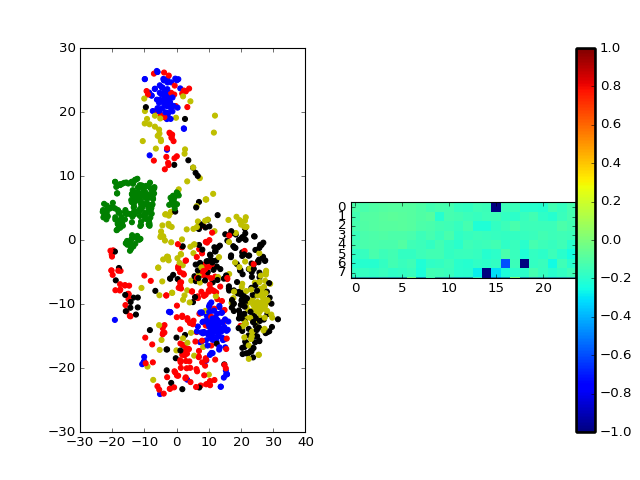

In [119]:
if __name__=="__main__":
    x_tr, tr_tsn, lbl_tr, rev_label_dict = pickle.load(open('./tsne.pkl'))
    walk_manifold(x_tr[:1000],tr_tsn[:1000], lbl_tr[:1000], rev_label_dict)